Vedlegg 2: Bruk av roboter i næringslivet

12351: Private føretak. Bruk av robotar, etter sysselsetting og næring (SN2007) (prosent) 2018 - 2022
I næringslivet brukes roboter til å utføre oppgaver av forskjellig slag. SSB følger med på utviklingen. 

Fra SSB.no (https://www.ssb.no/statbank/table/12351/) har vi følgende distinksjon:

Ein industrirobot er ein sjølvregulerande, reprogrammerbar, universal manipulator og brukast i industrielle automatiseringsprosessar.

Ein tjenesterobot er i noko grad ein sjølvstyrt maskin som utfører tenester for menneske, og brukast ikkje i industrielle automatiseringsprosessar.
 
Vedlagt ligger et datasett som inneholder prosentandel av private foretak som bruker roboter, i CSV- og JSON-format. Du kan velge hvilket av formatene du vil bruke: csv og json

Last ned datasettet i ønsket format og gjør deg kjent med det. Du må også forberede deg på å behandle datasettet med programmering og planlegge hvilke(t) bibliotek(er) som er egnet til dette. Du må også kontrollere at du har de nødvendige ressurser installert på den datamaskinen du skal bruke på eksamen. På eksamen vil du få to oppgaver hvor du skal behandle dette datasettet og presentere informasjon fra det med programmering.

Datasettet har følgende nøkler:

sysselsette: tekst, begrenset antall verdier
næring: tekst, begrenset antall verdier
Industrirobotar_2018, Industrirobotar_2020, Industrirobotar_2022, Tenesterobotar_2018, 
Tenesterobotar_2020, Tenesterobotar_2022: tall

Separatoren i CSV-filen er semikolon.
Filene har utf-8-encoding

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
pd.set_option('display.max_rows', None)

# Read the JSON file into a DataFrame
df = pd.read_json('roboter.json')

# Print the first few rows of the DataFrame
#df.describe()
#df.info()
df = df[df["Industrirobotar_2018"] != 0]
df["Pø Industriroboter 2018-2022"] = round(((df["Industrirobotar_2022"] - df["Industrirobotar_2018"])/df["Industrirobotar_2018"])*100)
#df.drop([])

df["Verdiøkning Industriroboter 2018-2022"] = df["Industrirobotar_2022"] - df["Industrirobotar_2018"]

#df = df.sort_values(by='Pø Industriroboter 2018-2022', ascending=False)
df = df.sort_values(by='Verdiøkning Industriroboter 2018-2022', ascending=False)

df[["sysselsette","næring","Industrirobotar_2018","Industrirobotar_2022","Pø Industriroboter 2018-2022","Verdiøkning Industriroboter 2018-2022"]].head(10)


,sysselsette,næring,Industrirobotar_2018,Industrirobotar_2022,Pø Industriroboter 2018-2022,Verdiøkning Industriroboter 2018-2022
57,100 sysselsette eller fleire,46 Agentur- og engroshandel med unntak av moto...,8,12,50.0,4
41,50-99 sysselsette,"10-39 Industri, kraftforsyning, vatn, avløp og...",21,22,5.0,1
5,Alle sysselsette,46 Agentur- og engroshandel med unntak av moto...,2,3,50.0,1
18,10-19 sysselsette,46 Agentur- og engroshandel med unntak av moto...,3,4,33.0,1
58,100 sysselsette eller fleire,47 Detaljhandel med unntak av motorvogner,2,3,50.0,1
27,20-49 sysselsette,"Total-K Alle næringer, uten finansnæringene",3,3,0.0,0
56,100 sysselsette eller fleire,45 Handel med og reparasjon av motorvogner,2,2,0.0,0
1,Alle sysselsette,"Total-K Alle næringer, uten finansnæringene",3,3,0.0,0
14,10-19 sysselsette,"Total-K Alle næringer, uten finansnæringene",2,2,0.0,0
61,100 sysselsette eller fleire,58-63 Informasjon og kommunikasjon,1,1,0.0,0


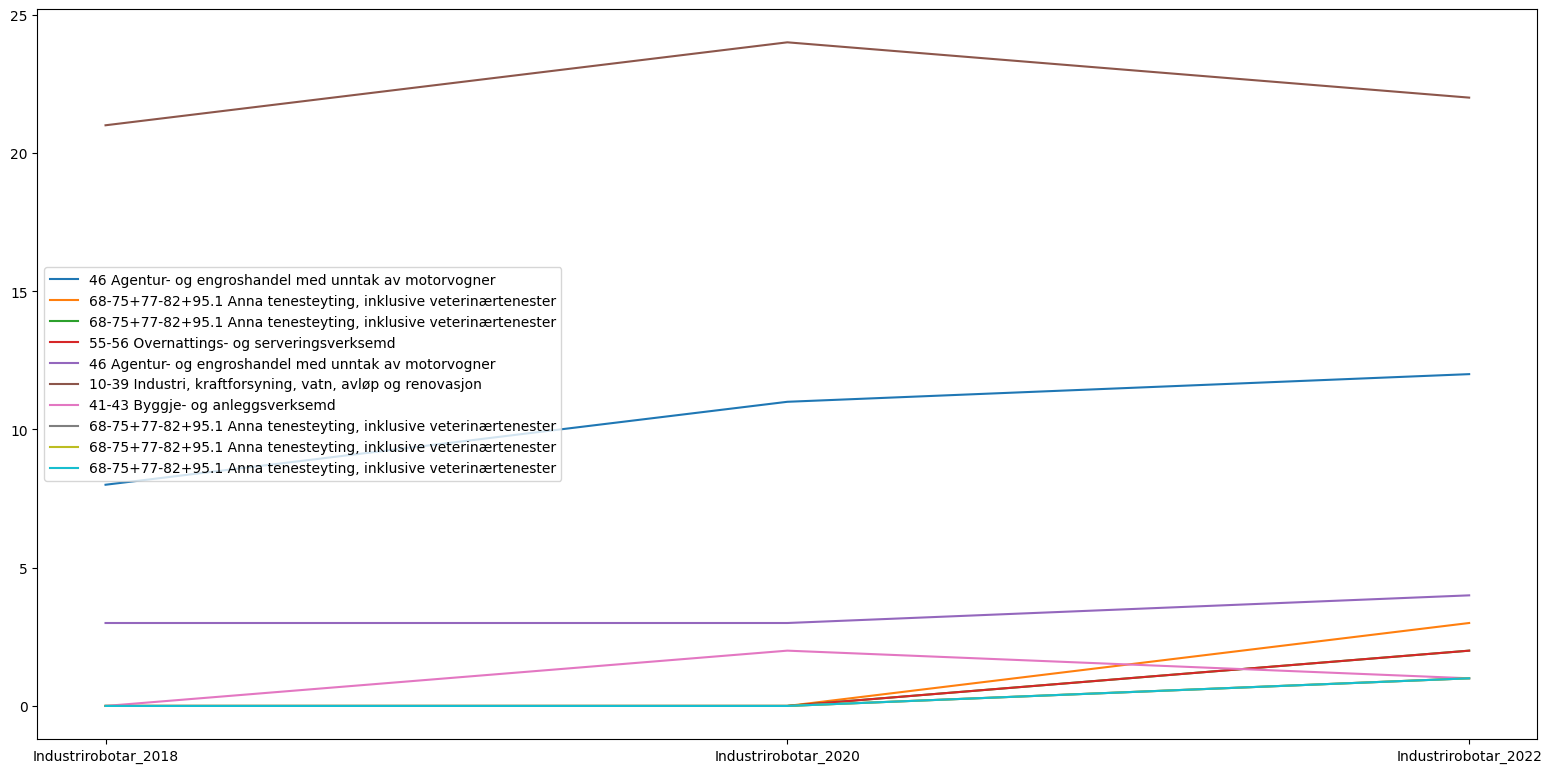

In [28]:
import matplotlib.pyplot as plt
# Read the JSON file into a DataFrame
df = pd.read_json('roboter.json')
df["Verdiøkning Industriroboter 2018-2022"] = df["Industrirobotar_2022"] - df["Industrirobotar_2018"]
highestIncrease = df.sort_values(by='Verdiøkning Industriroboter 2018-2022', ascending=False).iloc[:10]

plt.rcParams["figure.figsize"] = (20, 10)
plt.subplots_adjust(left=0.15, bottom=0.15)

x_values = ["Industrirobotar_2018", "Industrirobotar_2020", "Industrirobotar_2022"]
for index, row in highestIncrease.iterrows():
    plt.plot(x_values, row[x_values], label=row['næring'])

plt.legend()
plt.show()


